In [28]:
import bilby as bb
import gwpopulation as gwpop
import matplotlib.pyplot as plt
import pandas as pd
from bilby.core.prior import PriorDict, Uniform
import os
import bilby
import numpy as np

In [29]:
#gwpop.set_backend("jax")

#xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

In [30]:
netw = 'Asharp'
#netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'

if 'mass_band' in locals():
    print('Running for mass_band', mass_band)
    outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                          netw, 'mass_bands', mass_band, 'run07_gwfish_MDlow_mf_from_opt_SNR_injections_XPHM')
else:
    outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                          netw, 'run14_gwfish_MDhigh_mf_from_opt_SNR_injections_XPHM')
print(outdir)

/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/gwpop_analysis_results/Asharp/run14_gwfish_MDhigh_mf_from_opt_SNR_injections_XPHM


In [31]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))

## Add the new parameter which is peak of the curve

In [32]:
def z_peak_new(gamma, kappa, z_peak):
    new_peak = (gamma/(kappa-gamma))**(1/kappa) * (1+z_peak) - 1
    return(new_peak)

In [33]:
if "MDhigh" in outdir:
    true_params = {'gamma':1.7982, 'kappa':5.3226, 'z_peak':2.4199}
elif 'MDlow' in outdir:
    true_params = {'gamma':1.8111, 'kappa':5.2753, 'z_peak':1.4917}
else:
    true_params = {'gamma':1.8032, 'kappa':5.3023, 'z_peak':1.8362}
true_params['z_peak_new'] = z_peak_new(**true_params)

In [34]:
true_params

{'gamma': 1.7982,
 'kappa': 5.3226,
 'z_peak': 2.4199,
 'z_peak_new': 2.01374537781677}

In [35]:
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak
0,2.146871,4.868760,44243.747229,-5.857933,1.935251
1,2.014693,3.660427,44245.496722,-5.857933,1.728438
2,1.421486,7.322112,44245.635042,-5.857933,2.695791
3,2.186020,5.069157,44245.662660,-5.857933,1.691851
4,2.245105,3.558672,44245.860641,-5.857933,1.354169
...,...,...,...,...,...
3165,1.690807,5.057029,44254.244841,-5.857933,2.175836
3166,1.694071,5.021642,44254.245109,-5.857933,2.166594
3167,1.692982,5.016619,44254.247783,-5.857933,2.168323
3168,1.647487,5.070412,44254.250214,-5.857933,2.217944


In [36]:
result.priors

{'gamma': Uniform(minimum=0, maximum=5, name=None, latex_label='$\\gamma$', unit=None, boundary=None),
 'kappa': Uniform(minimum=0, maximum=20, name=None, latex_label='$\\kappa$', unit=None, boundary=None),
 'z_peak': Uniform(minimum=0.5, maximum=4, name=None, latex_label='$z_{peak}$', unit=None, boundary=None)}

In [37]:
z_peak_new_posterior = z_peak_new(result.posterior['gamma'], 
                                  result.posterior['kappa'], 
                                  result.posterior['z_peak'])

In [38]:
result.posterior.loc[:, 'z_peak_new'] = z_peak_new_posterior

In [39]:
result.posterior.sort_values('z_peak_new')

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
9,2.565691,4.525231,44246.913056,-5.857933,1.379839,1.525886
18,2.390705,4.509781,44247.574953,-5.857933,1.462019,1.528750
14,2.254251,4.312570,44247.214557,-5.857933,1.478328,1.531137
3,2.186020,5.069157,44245.662660,-5.857933,1.691851,1.548806
6,2.075841,4.116665,44246.001218,-5.857933,1.539497,1.550014
...,...,...,...,...,...,...
2,1.421486,7.322112,44245.635042,-5.857933,2.695791,2.042876
10,1.133900,6.414857,44246.963998,-5.857933,2.888891,2.059645
27,1.236501,6.971990,44248.420925,-5.857933,2.816554,2.062615
19,1.186257,7.097896,44247.798035,-5.857933,2.854397,2.073858


### Remove outlier points if need be

In [13]:
result.posterior = result.posterior.sort_values('z_peak_new').dropna()
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
2,1.909377,4.028104,34634.604913,-5.857933,0.897879,0.849488
22,2.213959,4.280166,34636.686941,-5.857933,0.866317,0.896677
3,1.349858,3.472432,34635.051344,-5.857933,1.171318,0.905958
71,1.832772,4.237036,34637.994992,-5.857933,1.039616,0.913060
85,1.351349,4.115770,34638.156767,-5.857933,1.281570,0.917390
...,...,...,...,...,...,...
51,0.670558,7.081169,34637.632125,-5.857933,2.211912,1.335086
13,0.825963,6.375399,34636.124033,-5.857933,2.156971,1.341574
50,0.564223,6.898971,34637.574530,-5.857933,2.331264,1.346238
30,0.549973,7.482127,34637.032166,-5.857933,2.293432,1.347260


In [14]:
ci99 = (result.posterior['z_peak_new'] > np.quantile(result.posterior['z_peak_new'], 0.99))
negative_vals = (result.posterior['z_peak_new'] < 0)
drop_index = result.posterior[ci99 | negative_vals].index
#drop_index = result.posterior[negative_vals].index

In [15]:
drop_index

Index([367, 144,  96,  62, 295, 307, 340, 316,  59, 265, 194,  41, 253, 152,
       202, 189, 210, 221,  48,  11, 136,  72, 105,  66,  70,  74,  29,  51,
        13,  50,  30,  10],
      dtype='int64')

In [42]:
result.posterior = result.posterior.drop(index=drop_index)
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
2259,0.459577,1.773566,1382.157235,-5.857933,0.813951,0.003194
1622,0.065394,2.479882,1381.875292,-5.857933,3.300749,0.003562
2439,0.422094,1.610680,1382.242646,-5.857933,0.908871,0.003752
1632,0.384894,1.204640,1381.880006,-5.857933,0.882309,0.004917
2213,0.207433,1.726189,1382.130970,-5.857933,2.192970,0.007666
...,...,...,...,...,...,...
29,0.586279,3.683171,1377.634691,-5.857933,3.792779,2.050265
25,0.425151,6.192515,1377.548880,-5.857933,3.686883,2.076187
87,0.096465,9.439633,1378.883101,-5.857933,3.993940,2.076385
227,0.277729,0.539024,1379.942669,-5.857933,1.773009,2.105247


### Plot corner

In [40]:
true_params

{'gamma': 1.7982,
 'kappa': 5.3226,
 'z_peak': 2.4199,
 'z_peak_new': 2.01374537781677}

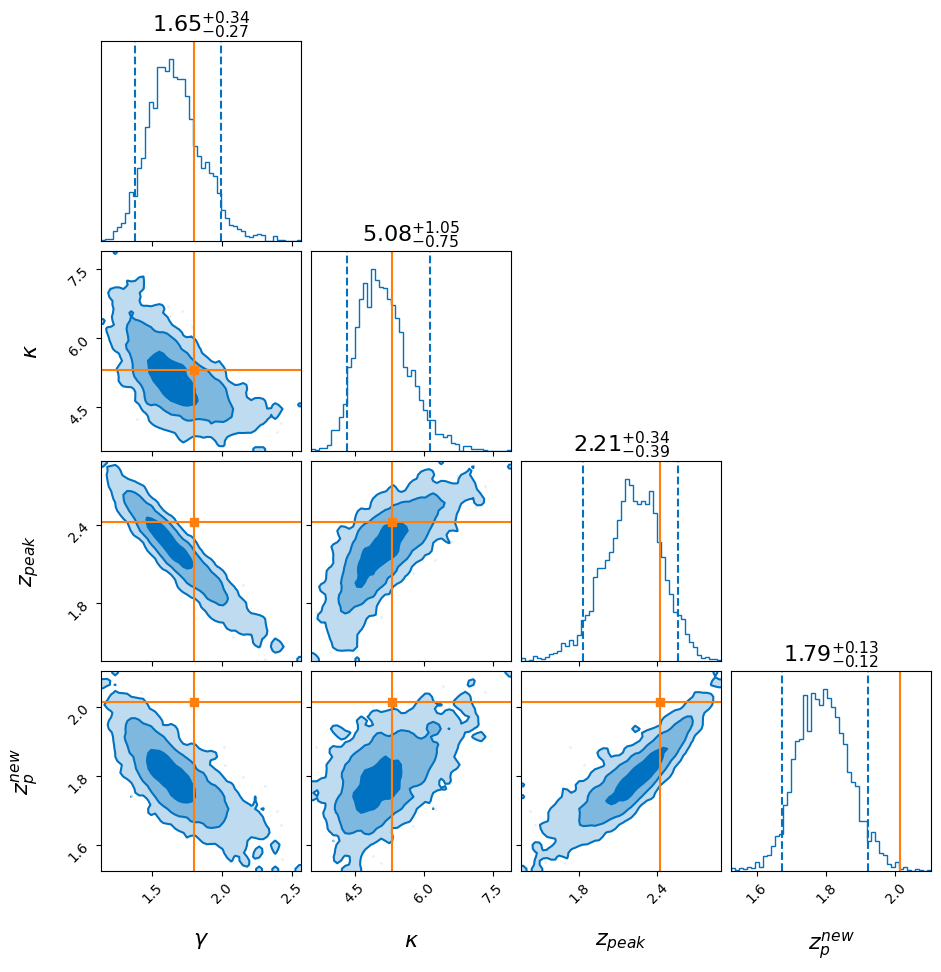

In [41]:
#result.plot_corner(parameters=list(true_params.keys()), outdir=outdir)
filename = f'{netw}_corner_with_truths.png'
#filename = 'CE4020ET123_corner_with_truths.png'
result.plot_corner(parameters=true_params, outdir=outdir, 
                   quantiles=(0.05, 0.95), 
                   filename=os.path.join(outdir, filename), labels=['$\\gamma$', '$\\kappa$', '$z_{peak}$', '$z_{p}^{new}$'])

## Check variance

In [74]:
#gwpop.set_backend("jax")

#xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

In [75]:
netw = 'Asharp'
#netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'mass_bands', mass_band, 'run03_gwfish_mf_from_opt_SNR_injections_XPHM')
rundir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'run05_gwfish_mf_from_opt_SNR_injections_XPHM')

In [76]:
var_data = pd.read_csv(os.path.join(rundir, 'full_posterior_low_var_events.csv'))

In [77]:
var_data

,Unnamed: 0,key,sample_0
0,0,var_0,1.369832e-05
1,1,var_1,6.418322e-06
2,2,var_10,9.650263e-06
3,3,var_100,3.412744e-06
4,4,var_1000,3.183374e-06
...,...,...,...
4052,4052,var_995,1.788858e-06
4053,4053,var_996,7.791295e-06
4054,4054,var_997,4.116156e-06
4055,4055,var_998,2.848729e-07


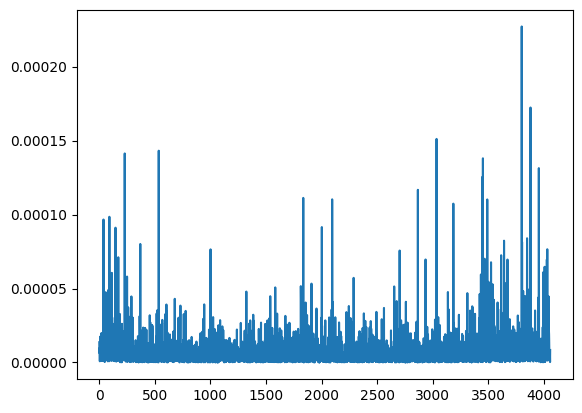

In [86]:
plt.plot(var_data['sample_0']);

In [82]:
np.sum(var_data['sample_0'])

0.02927127576058349

## Calculate variance

In [19]:
gwpop.set_backend("jax")
from gwpopulation.experimental.jax import JittedLikelihood, NonCachingModel
import jax

xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/htcondor/__init__.py:49: UserWarning: Neither the environment variable CONDOR_CONFIG, /etc/condor/, /usr/local/etc/, nor ~condor/ contain a condor_config source. Therefore, we are using a null condor_config.
  _warnings.warn(message)


In [22]:
#netw = 'Asharp'
netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
mass_band = 'above_80'
outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'mass_bands', mass_band, 'run01_original_cov_mf_from_opt_SNR_injections_XPHM')
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'run09_original_cov_mf_from_opt_SNR_injections_XPHM')

In [23]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))
#result = bilby.result.read_in_result(filename=os.path.join(outdir, 'CE4020ET123_result.hdf5'))

In [24]:
with open(os.path.join(outdir, 'README.txt'), 'r') as f:
    lines = [line.rstrip('\n').strip('\t') for line in f]
readme_dict = {}
for line in lines:
    words = line.split()
    if 'Posterior' in words:
        readme_dict['posterior_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')
    elif 'Injections' in words:
        readme_dict['injections_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')

In [25]:
readme_dict

{'posterior_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/mass_bands/CE4020ET123_CoBA10_2_PLP_z_MD_zmax_10_lmrd_22_no_spins_set3_z_posteriors_original_cov_49_events_pop_from_XPHM_above_80.pkl',
 'injections_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/mass_bands/XPHM/CE4020ET123_CoBA10_SNR_2_pop_PLP_spin_prec_z_MD_zmax_10_lmrd_22_corrected_td_detected_injs_mf_from_opt_SNR_19852_points_above_80.pkl'}

In [26]:
# ## Load posteriors
posteriors = pd.read_pickle(readme_dict['posterior_file'])

In [127]:
# ## Load injections

import dill
from tqdm import tqdm

with open(readme_dict['injections_file'], "rb") as ff:
    injections = dill.load(ff)

In [128]:
z_max = 10
model = NonCachingModel(
    model_functions=[gwpop.models.redshift.MadauDickinsonRedshift(cosmo_model="Planck18", z_max=z_max)],
    #model_functions=[gwpop.models.redshift.PowerLawRedshift(z_max=8)],
)

vt = gwpop.vt.ResamplingVT(model=model, data=injections, n_events=len(posteriors))

likelihood = gwpop.hyperpe.HyperparameterLikelihood(
    posteriors=posteriors,
    hyper_prior=model,
    selection_function=vt,
)

priors = PriorDict()
priors['gamma'] = Uniform(minimum=0, maximum=5, latex_label="$\\gamma$")
priors['kappa'] = Uniform(minimum=0, maximum=20, latex_label="$\\kappa$")
priors['z_peak'] = Uniform(minimum=0.5, maximum=4, latex_label="$z_{peak}$")

parameters = priors.sample()
likelihood.parameters.update(parameters)

In [131]:
likelihood.ln_likelihood_and_variance?

Signature: likelihood.ln_likelihood_and_variance()
Docstring: Compute the ln likelihood estimator and its variance.
File:      ~/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/gwpopulation/hyperpe.py
Type:      method

In [30]:
func = jax.jit(likelihood.generate_extra_statistics)
#func = jax.jit(likelihood.ln_likelihood_and_variance)

In [43]:
test_full_posterior_list = [func(parameters) for parameters in tqdm(result.posterior.to_dict(orient="records"), desc='constructing full posterior')]
test_full_posterior = pd.DataFrame(test_full_posterior_list).astype(float)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2726/2726 [00:15<00:00, 171.65it/s]


In [58]:
len(test_full_posterior_list)

2726

In [118]:
import numpy as np

keys_ln_bf = []
keys_var_event = []
keys_main = []
for key in test_full_posterior_list[0].keys():
    if 'ln_bf' in key:
        keys_ln_bf.append(key)
    elif 'var_' in key:
        keys_var_event.append(key)
    else:
        keys_main.append(key)
keys_ln_bf.extend(keys_main)
keys_var_event.extend(keys_main)
"""
# Convert keys to list of indices (functions) to avoid repeated lookups
extractors_ln_bf     = [lambda d, k=k: d[k] for k in keys_ln_bf]
extractors_var_event = [lambda d, k=k: d[k] for k in keys_var_event]
extractors_main      = [lambda d, k=k: d[k] for k in keys_main]

# Preallocate arrays
N = len(test_full_posterior_list)
data_ln_bf     = np.empty((N, len(keys_ln_bf)), dtype=np.float32)
data_var_event = np.empty((N, len(keys_var_event)), dtype=np.float32)
data_main      = np.empty((N, len(keys_main)), dtype=np.float32)

# Fill arrays using extractors
for i, d in tqdm(enumerate(test_full_posterior_list), total=N, desc='Converting to arrays'):
    data_ln_bf[i]     = [f(d) for f in extractors_ln_bf]
    data_var_event[i] = [f(d) for f in extractors_var_event]
    data_main[i]      = [f(d) for f in extractors_main]

# Vectorized conversion to dict of arrays
dict_ln_bf     = dict(zip(keys_ln_bf,     data_ln_bf.T))
dict_var_event = dict(zip(keys_var_event, data_var_event.T))
dict_main      = dict(zip(keys_main,      data_main.T))

"""
data_ln_bf = np.empty((len(test_full_posterior_list), len(keys_ln_bf)), dtype=np.float32)
data_var_event = np.empty((len(test_full_posterior_list), len(keys_var_event)), dtype=np.float32)
data_main = np.empty((len(test_full_posterior_list), len(keys_main)), dtype=np.float32)

for i, d in tqdm(enumerate(test_full_posterior_list), total=len(test_full_posterior_list), desc='Converting to dictionaries'):
    data_ln_bf[i] = [d[k] for k in keys_ln_bf]
    data_var_event[i] = [d[k] for k in keys_var_event]
    data_main[i] = [d[k] for k in keys_main]

# Convert to dict of arrays
dict_ln_bf = {k: data_ln_bf[:, i] for i, k in enumerate(keys_ln_bf)}
dict_var_event = {k: data_var_event[:, i] for i, k in enumerate(keys_var_event)}
dict_main = {k: data_main[:, i] for i, k in enumerate(keys_main)}

Converting to dictionaries: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2726/2726 [00:01<00:00, 1526.93it/s]


In [108]:
df_main = pd.DataFrame(dict_main)

In [109]:
df_main.describe()

,gamma,kappa,log_likelihood,log_prior,selection,selection_variance,variance,z_peak
count,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2.726000e+03,2726.000000,2726.000000
mean,1.907401,5.996839,348.920807,-5.857933,0.999426,2.852150e-06,0.006922,2.068088
std,1.418292,1.680055,0.973480,0.000000,0.001255,2.823121e-06,0.006776,0.851838
min,0.000085,2.126269,340.495758,-5.857933,0.995153,3.261948e-08,0.000150,0.505977
25%,0.687937,4.923723,348.497223,-5.857933,0.998645,1.178110e-06,0.002897,1.354990
50%,1.576846,5.878192,349.140945,-5.857933,0.999521,2.046581e-06,0.004986,1.916559
75%,2.985056,6.878242,349.599495,-5.857933,1.000288,3.619512e-06,0.008758,2.738614
max,4.998580,17.243456,350.289764,-5.857933,1.003706,3.582271e-05,0.086029,3.999785


In [113]:
df_main[result.search_parameter_keys + ["log_likelihood", "variance"]].corr()

,gamma,kappa,z_peak,log_likelihood,variance
gamma,1.000000,0.198562,-0.804147,0.311881,-0.050510
kappa,0.198562,1.000000,0.250383,-0.164009,-0.004891
z_peak,-0.804147,0.250383,1.000000,-0.320078,0.032138
log_likelihood,0.311881,-0.164009,-0.320078,1.000000,-0.807387
variance,-0.050510,-0.004891,0.032138,-0.807387,1.000000


### Save to files

In [112]:
import h5py
with h5py.File(os.path.join(outdir, 'ln_bf_vals_events.h5'), 'w') as f:
    for key, array in dict_ln_bf.items():
        f.create_dataset(key, data=array)

with h5py.File(os.path.join(outdir, 'var_vals_events.h5'), 'w') as f:
    for key, array in dict_var_event.items():
        f.create_dataset(key, data=array)

In [114]:
df_main.to_csv(os.path.join(outdir, 'full_posterior_main.csv'))

### Plot the scatter matrix

In [115]:
pd.plotting.scatter_matrix(
    df_main[["gamma", "kappa", "z_peak", "log_likelihood", "variance"]],
    alpha=0.5,
)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'param_variance_matrix.png'), dpi=300)